In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv('df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   license_class                           653 non-null    object 
 1   trips_per_day                           653 non-null    int64  
 2   farebox_per_day                         653 non-null    int64  
 3   unique_drivers                          653 non-null    int64  
 4   unique_vehicles                         653 non-null    int64  
 5   vehicles_per_day                        653 non-null    int64  
 6   avg_days_vehicles_on_road               653 non-null    float64
 7   avg_hours_per_day_per_vehicle           653 non-null    float64
 8   avg_days_drivers_on_road                653 non-null    float64
 9   avg_hours_per_day_per_driver            653 non-null    float64
 10  avg_minutes_per_trip                    653 non-null    float6

In [4]:
df.columns

Index(['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'percent_of_trips_paid_with_credit_card', 'trips_per_day_shared',
       'date', 'month_year1', 'trips_per_month', 'month_date',
       'farebox_per_month', 'week', 'trips_per_week', 'year',
       'farebox_per_week', 'total_trips_per_day',
       'shared_trips_per_day_percent', 'farebox_per_trip',
       'farebox_per_vehicle'],
      dtype='object')

In [5]:
df = df[['license_class', 'trips_per_day', 'farebox_per_day', 'unique_drivers',
       'unique_vehicles', 'vehicles_per_day', 'avg_days_vehicles_on_road',
       'avg_hours_per_day_per_vehicle', 'avg_days_drivers_on_road',
       'avg_hours_per_day_per_driver', 'avg_minutes_per_trip',
       'date', 'month_year1', 'trips_per_month', 'month_date',
       'farebox_per_month', 'year',
       'farebox_per_week', 'total_trips_per_day','farebox_per_trip',
       'farebox_per_vehicle']]

## df0 = Metricas totales

In [6]:
df['month_date'] = pd.to_datetime(df['month_date'])
df0 = df.groupby(by=['month_date']).sum()
df0

/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_1162/3527076304.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df0 = df.groupby(by=['month_date']).sum()


,trips_per_day,farebox_per_day,unique_drivers,unique_vehicles,vehicles_per_day,avg_days_vehicles_on_road,avg_hours_per_day_per_vehicle,avg_days_drivers_on_road,avg_hours_per_day_per_driver,avg_minutes_per_trip,trips_per_month,farebox_per_month,year,farebox_per_week,total_trips_per_day,farebox_per_trip,farebox_per_vehicle
month_date,,,,,,,,,,,,,,,,,
2010-01-28,479376,4968817,30659,13305,12727,29.7,14.3,22.5,8.2,0.0,14860656,154033327,2010,34781719,479376,10.365177,11577.100864
2010-02-28,397969,3392416,28255,12171,10045,23.1,14.6,17.6,8.3,11.1,11143132,94987648,2010,23746912,397969,8.524322,7804.424287
2010-03-28,415567,3011750,28709,12183,10382,26.4,15.1,20.4,8.3,11.5,12882577,93364250,2010,21082250,415567,7.247327,7663.486005
2010-04-28,504798,5502545,30827,13326,12856,28.9,14.8,22.3,8.3,0.0,15143940,165076350,2010,38517815,504798,10.900489,12387.539397
2010-05-28,499374,5561218,30950,13309,12729,29.6,14.8,22.7,8.3,0.0,15480594,172397758,2010,38928526,499374,11.136379,12953.471936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,690095,1957285,95327,90376,59098,106.4,29.6,101.5,28.0,166.2,21392945,60675835,12132,13700995,690561,37.236607,9599.543143
2022-09-28,739744,2144321,99638,93695,62969,105.4,30.6,100.0,28.8,175.4,22192320,64329630,12132,15010247,740187,38.914394,9963.153880
2022-10-28,780844,2332974,101786,95077,65000,110.8,30.8,104.5,29.0,172.1,24206164,72322194,12132,16330818,784417,37.299075,10716.146841


## df1 = Agrupacion por license_class

In [7]:

df['license_class'] = df['license_class'].astype('category')
df['month_date'] = pd.to_datetime(df['month_date'])
df1 = df.groupby(by=['month_date','license_class']).sum()
df1

/var/folders/qr/g6x89n_d48j570j5qt_7mrhr0000gn/T/ipykernel_1162/3547229050.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = df.groupby(by=['month_date','license_class']).sum()


trips_per_day  farebox_per_day  unique_drivers  \
month_date license_class                                                       
2010-01-28 FHV - Black Car                0                0               0   
           FHV - High Volume              0                0               0   
           FHV - Livery                   0                0               0   
           FHV - Lux Limo                 0                0               0   
           Green                          0                0               0   
...                                     ...              ...             ...   
2022-12-28 FHV - High Volume         634379                0           78091   
           FHV - Livery               17750                0            4059   
           FHV - Lux Limo              1068                0            1654   
           Green                       2336            45208             965   
           Yellow                    109290          2358924           10749   

                              unique_vehicles  vehicles_per_day  \
month_date license_class                                          
2010-01-28 FHV - Black Car                  0                 0   
           FHV - High Volume                0                 0   
           FHV - Livery                     0                 0   
           FHV - Lux Limo                   0                 0   
           Green                            0                 0   
...                                       ...               ...   
2022-12-28 FHV - High Volume            74877             52087   
           FHV - Livery                  3888              2577   
           FHV - Lux Limo                1604               521   
           Green                          942               496   
           Yellow                        7791              6529   

                              avg_days_vehicles_on_road  \
month_date license_class                                  
2010-01-28 FHV - Black Car                          0.0   
           FHV - High Volume                        0.0   
           FHV - Livery                             0.0   
           FHV - Lux Limo                           0.0   
           Green                                    0.0   
...                                                 ...   
2022-12-28 FHV - High Volume                       21.6   
           FHV - Livery                            20.6   
           FHV - Lux Limo                          10.1   
           Green                                   16.3   
           Yellow                                  26.0   

                              avg_hours_per_day_per_vehicle  \
month_date license_class                                      
2010-01-28 FHV - Black Car                              0.0   
           FHV - High Volume                            0.0   
           FHV - Livery                                 0.0   
           FHV - Lux Limo                               0.0   
           Green                                        0.0   
...                                                     ...   
2022-12-28 FHV - High Volume                            6.6   
           FHV - Livery                                 5.1   
           FHV - Lux Limo                               2.0   
           Green                                        3.6   
           Yellow                                       8.7   

                              avg_days_drivers_on_road  \
month_date license_class                                 
2010-01-28 FHV - Black Car                         0.0   
           FHV - High Volume                       0.0   
           FHV - Livery                            0.0   
           FHV - Lux Limo                          0.0   
           Green                                   0.0   
...                                                ...   
2022-12-28 FHV - High Volume                      21.1   
       

## df2 = Cantidad de vehiculos

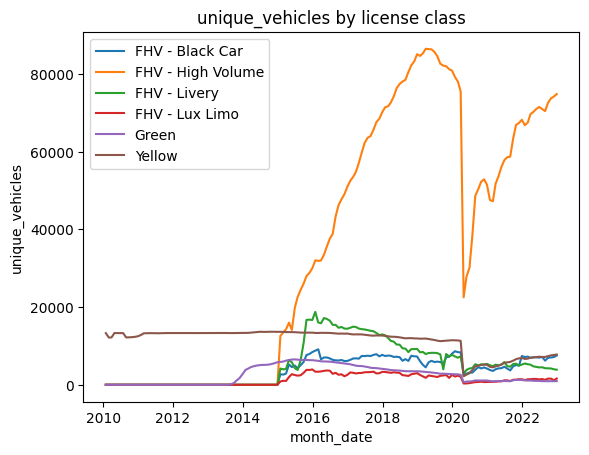

In [8]:

for lic_class in df['license_class'].unique():
    data_subset = df1.loc[df1.index.get_level_values('license_class')==lic_class]
    sns.lineplot(x=data_subset.index.get_level_values('month_date'), y=data_subset['unique_vehicles'], label=lic_class)

plt.title("unique_vehicles by license class")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


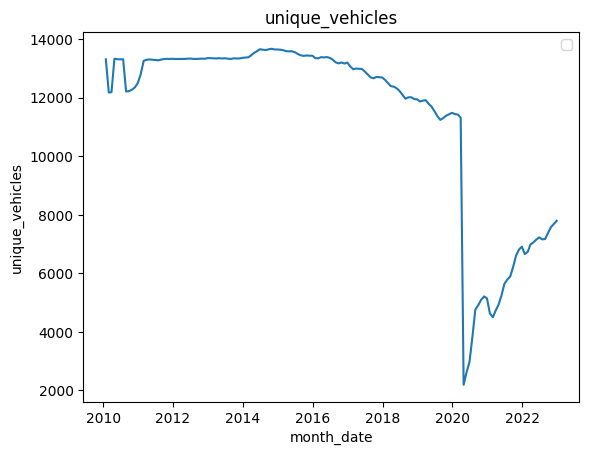

In [9]:
sns.lineplot(x=data_subset.index.get_level_values('month_date'), y=data_subset['unique_vehicles'])
plt.title("unique_vehicles")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


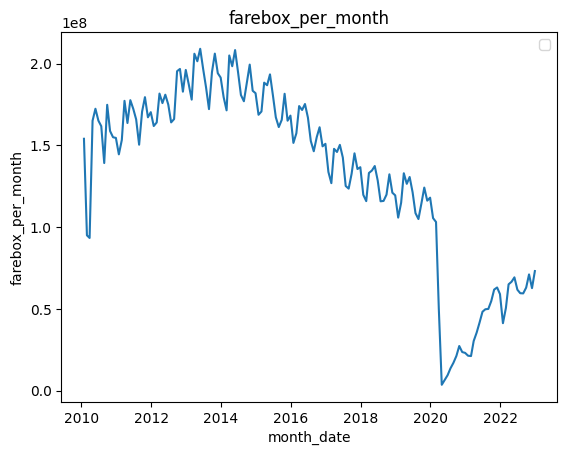

In [10]:
sns.lineplot(x=data_subset.index.get_level_values('month_date'), y=data_subset['farebox_per_month'])
plt.title("farebox_per_month")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


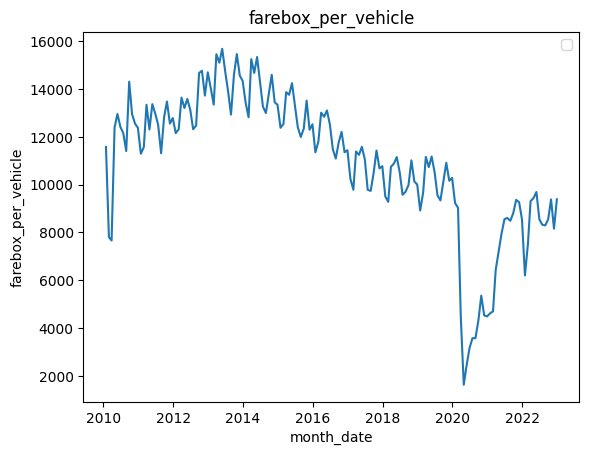

In [11]:
sns.lineplot(x=data_subset.index.get_level_values('month_date'), y=data_subset['farebox_per_vehicle'])
plt.title("farebox_per_vehicle")
plt.legend()
plt.show()

In [25]:
df2 = df1[['unique_vehicles', 'vehicles_per_day']]
df2

unique_vehicles  vehicles_per_day
month_date license_class                                       
2010-01-28 FHV - Black Car                  0                 0
           FHV - High Volume                0                 0
           FHV - Livery                     0                 0
           FHV - Lux Limo                   0                 0
           Green                            0                 0
...                                       ...               ...
2022-12-28 FHV - High Volume            74877             52087
           FHV - Livery                  3888              2577
           FHV - Lux Limo                1604               521
           Green                          942               496
           Yellow                        7791              6529

[936 rows x 2 columns]

In [31]:
df0.to_csv('total_metrics.csv')
df2.to_csv('metrics.csv')

## df3 = Cantidad de viajes

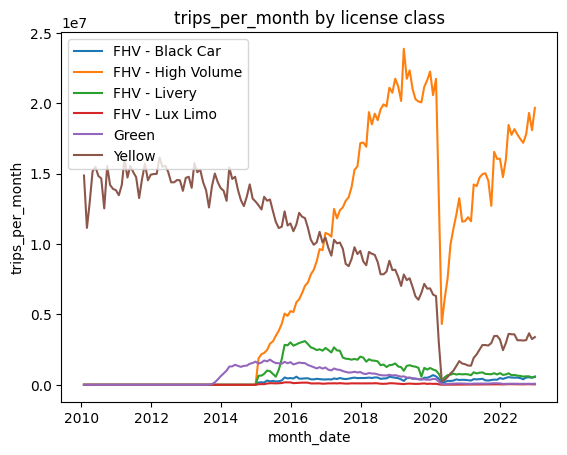

In [12]:

for lic_class in df['license_class'].unique():
    data_subset = df1.loc[df1.index.get_level_values('license_class')==lic_class]
    sns.lineplot(x=data_subset.index.get_level_values('month_date'), y=data_subset['trips_per_month'], label=lic_class)

plt.title("trips_per_month by license class")
plt.legend()
plt.show()

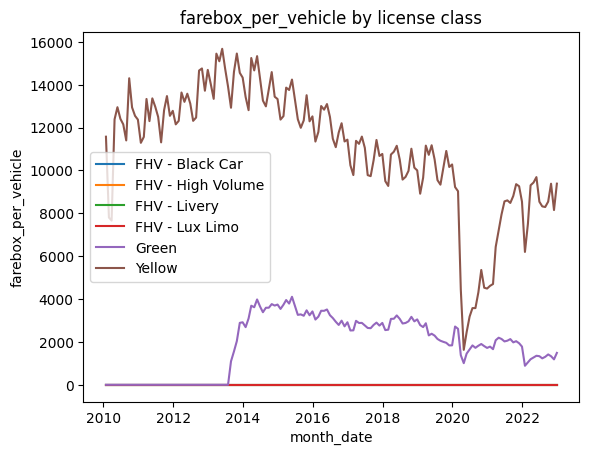

In [14]:
for lic_class in df['license_class'].unique():
    data_subset = df1.loc[df1.index.get_level_values('license_class')==lic_class]
    sns.lineplot(x=data_subset.index.get_level_values('month_date'), y=data_subset['farebox_per_vehicle'], label=lic_class)

plt.title("farebox_per_vehicle by license class")
plt.legend()
plt.show()